In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from keras.layers import Lambda, Input, Dense, Dropout
from keras.models import Model
#from keras import backend as K
#from keras import regularizers
from pandas.plotting import scatter_matrix
#import argparse
#import os
from keras.losses import mse#, binary_crossentropy
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping

%matplotlib inline

Using TensorFlow backend.


In [2]:
df_atmes = pd.read_csv("americanToadPadraoMes.csv")
#df_gfmes = pd.read_csv("greenFrogPadraoMes.csv")
#df_spmes = pd.read_csv("springPeeperPadraoMes.csv")
#df_atest = pd.read_csv("americanToadPadraoEstacao.csv")
#df_gfest = pd.read_csv("greenFrogPadraoEstacao.csv")
#df_spest = pd.read_csv("springPeeperPadraoEstacao.csv")

Text(0,0.5,'Longitude')

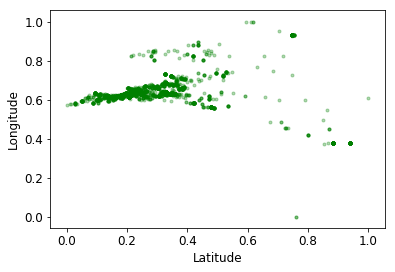

In [27]:
plt.scatter(df_atmes["lat"], df_atmes["lng"],marker=".",alpha='0.3',color="green")
plt.xlabel('Latitude')
plt.ylabel("Longitude")

# Autoencoder

In [4]:
df_atmes.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
input_dim = len(df_atmes.columns)
input_dim

28

In [6]:
# Rede com duas camadas decodificadas e batch_normalizzation
encoding_dim1 = input_dim//2
entrada = Input(shape=(input_dim,))
batch1 = BatchNormalization()(entrada)
encoded1 = Dense(encoding_dim1,activation="relu")(batch1)
dp2 = Dropout(0.1)(encoded1)
encoded2 = Dense(encoding_dim1,activation="relu")(dp2)
batch2 = BatchNormalization()(encoded2)
decoded = Dense(input_dim,activation="sigmoid")(batch2)

In [7]:
# Cria o modelo para a rede anteriormente montada
autoencoder = Model(entrada,decoded)

In [8]:
# Compila o modelo com o método otimizador e a funlção de erro utilizadas
autoencoder.compile(optimizer='adam', loss='mse')

In [9]:
# Separa as base de treino e teste
X_trainAtMes, X_testAtMes = train_test_split(df_atmes, test_size=0.30, random_state=42)

In [10]:
batch = len(df_atmes)//10
batch

367

In [11]:
attest_dim = len(X_testAtMes)//10
attest_dim

110

In [12]:
# Treina a rede
# EarlyStopping para o treinamento se ver que não tá mais melhorando
# History é para plotar gráficos de erro
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)
history = autoencoder.fit(X_trainAtMes, X_trainAtMes,
                epochs=3000,
                batch_size=batch,
                shuffle=True,
                validation_data=(X_testAtMes, X_testAtMes))#,
                #callbacks=[es])

Train on 2572 samples, validate on 1103 samples
Epoch 1/3000
2572/2572 [==============================] - 2s 884us/step - loss: 0.1456 - val_loss: 0.1430
Epoch 2/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.1396 - val_loss: 0.1366
Epoch 3/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.1343 - val_loss: 0.1305
Epoch 4/3000
2572/2572 [==============================] - 0s 29us/step - loss: 0.1300 - val_loss: 0.1269
Epoch 5/3000
2572/2572 [==============================] - 0s 31us/step - loss: 0.1255 - val_loss: 0.1228
Epoch 6/3000
2572/2572 [==============================] - 0s 24us/step - loss: 0.1209 - val_loss: 0.1191
Epoch 7/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.1173 - val_loss: 0.1154
Epoch 8/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.1137 - val_loss: 0.1110
Epoch 9/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.1098 - val_loss: 0.1070
Epoch 

Epoch 78/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0127 - val_loss: 0.0112
Epoch 79/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0127 - val_loss: 0.0111
Epoch 80/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0125 - val_loss: 0.0110
Epoch 81/3000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0125 - val_loss: 0.0109
Epoch 82/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0124 - val_loss: 0.0108
Epoch 83/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0122 - val_loss: 0.0107
Epoch 84/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0122 - val_loss: 0.0106
Epoch 85/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0120 - val_loss: 0.0105
Epoch 86/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0120 - val_loss: 0.0104
Epoch 87/3000
2572/2572 [=====================

Epoch 155/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0081 - val_loss: 0.0063
Epoch 156/3000
2572/2572 [==============================] - 0s 25us/step - loss: 0.0078 - val_loss: 0.0062
Epoch 157/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0078 - val_loss: 0.0062
Epoch 158/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0080 - val_loss: 0.0062
Epoch 159/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0078 - val_loss: 0.0061
Epoch 160/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0077 - val_loss: 0.0061
Epoch 161/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0077 - val_loss: 0.0060
Epoch 162/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0078 - val_loss: 0.0060
Epoch 163/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0076 - val_loss: 0.0059
Epoch 164/3000
2572/2572 [===========

2572/2572 [==============================] - 0s 18us/step - loss: 0.0063 - val_loss: 0.0046
Epoch 232/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0062 - val_loss: 0.0045
Epoch 233/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0062 - val_loss: 0.0045
Epoch 234/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0062 - val_loss: 0.0044
Epoch 235/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0062 - val_loss: 0.0044
Epoch 236/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0061 - val_loss: 0.0044
Epoch 237/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0061 - val_loss: 0.0044
Epoch 238/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0062 - val_loss: 0.0043
Epoch 239/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0061 - val_loss: 0.0043
Epoch 240/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 14us/step - loss: 0.0055 - val_loss: 0.0037
Epoch 308/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0055 - val_loss: 0.0036
Epoch 309/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0055 - val_loss: 0.0037
Epoch 310/3000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0056 - val_loss: 0.0037
Epoch 311/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0055 - val_loss: 0.0037
Epoch 312/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0055 - val_loss: 0.0037
Epoch 313/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0054 - val_loss: 0.0036
Epoch 314/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0054 - val_loss: 0.0036
Epoch 315/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0054 - val_loss: 0.0036
Epoch 316/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 19us/step - loss: 0.0052 - val_loss: 0.0034
Epoch 384/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0053 - val_loss: 0.0034
Epoch 385/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0051 - val_loss: 0.0034
Epoch 386/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0051 - val_loss: 0.0034
Epoch 387/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0053 - val_loss: 0.0034
Epoch 388/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0051 - val_loss: 0.0034
Epoch 389/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0052 - val_loss: 0.0034
Epoch 390/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0050 - val_loss: 0.0034
Epoch 391/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0052 - val_loss: 0.0034
Epoch 392/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 19us/step - loss: 0.0048 - val_loss: 0.0031
Epoch 460/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0050 - val_loss: 0.0031
Epoch 461/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0048 - val_loss: 0.0031
Epoch 462/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0048 - val_loss: 0.0031
Epoch 463/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0048 - val_loss: 0.0031
Epoch 464/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0049 - val_loss: 0.0031
Epoch 465/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0048 - val_loss: 0.0031
Epoch 466/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0047 - val_loss: 0.0031
Epoch 467/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0049 - val_loss: 0.0031
Epoch 468/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 21us/step - loss: 0.0048 - val_loss: 0.0030
Epoch 536/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0047 - val_loss: 0.0029
Epoch 537/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0047 - val_loss: 0.0029
Epoch 538/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0047 - val_loss: 0.0030
Epoch 539/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0046 - val_loss: 0.0030
Epoch 540/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0046 - val_loss: 0.0030
Epoch 541/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0046 - val_loss: 0.0030
Epoch 542/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0045 - val_loss: 0.0030
Epoch 543/3000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0046 - val_loss: 0.0030
Epoch 544/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 18us/step - loss: 0.0046 - val_loss: 0.0028
Epoch 612/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0045 - val_loss: 0.0028
Epoch 613/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0045 - val_loss: 0.0028
Epoch 614/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0046 - val_loss: 0.0028
Epoch 615/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0044 - val_loss: 0.0028
Epoch 616/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0046 - val_loss: 0.0028
Epoch 617/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0045 - val_loss: 0.0028
Epoch 618/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0044 - val_loss: 0.0028
Epoch 619/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0044 - val_loss: 0.0028
Epoch 620/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 17us/step - loss: 0.0044 - val_loss: 0.0027
Epoch 688/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0044 - val_loss: 0.0027
Epoch 689/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0043 - val_loss: 0.0027
Epoch 690/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0043 - val_loss: 0.0027
Epoch 691/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0043 - val_loss: 0.0027
Epoch 692/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0044 - val_loss: 0.0028
Epoch 693/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0043 - val_loss: 0.0028
Epoch 694/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0045 - val_loss: 0.0028
Epoch 695/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0044 - val_loss: 0.0028
Epoch 696/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 19us/step - loss: 0.0044 - val_loss: 0.0025
Epoch 764/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0041 - val_loss: 0.0025
Epoch 765/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0042 - val_loss: 0.0025
Epoch 766/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0043 - val_loss: 0.0025
Epoch 767/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0041 - val_loss: 0.0026
Epoch 768/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0041 - val_loss: 0.0026
Epoch 769/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0044 - val_loss: 0.0026
Epoch 770/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0044 - val_loss: 0.0026
Epoch 771/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0044 - val_loss: 0.0026
Epoch 772/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 16us/step - loss: 0.0042 - val_loss: 0.0024
Epoch 840/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0041 - val_loss: 0.0024
Epoch 841/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0042 - val_loss: 0.0025
Epoch 842/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0041 - val_loss: 0.0024
Epoch 843/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0041 - val_loss: 0.0024
Epoch 844/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0041 - val_loss: 0.0024
Epoch 845/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0041 - val_loss: 0.0024
Epoch 846/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0041 - val_loss: 0.0024
Epoch 847/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0041 - val_loss: 0.0025
Epoch 848/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 18us/step - loss: 0.0041 - val_loss: 0.0024
Epoch 916/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0040 - val_loss: 0.0024
Epoch 917/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0039 - val_loss: 0.0023
Epoch 918/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0039 - val_loss: 0.0023
Epoch 919/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0041 - val_loss: 0.0023
Epoch 920/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0040 - val_loss: 0.0023
Epoch 921/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0041 - val_loss: 0.0023
Epoch 922/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0040 - val_loss: 0.0023
Epoch 923/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0041 - val_loss: 0.0024
Epoch 924/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 19us/step - loss: 0.0040 - val_loss: 0.0022
Epoch 992/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0039 - val_loss: 0.0023
Epoch 993/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0039 - val_loss: 0.0023
Epoch 994/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0040 - val_loss: 0.0023
Epoch 995/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0041 - val_loss: 0.0023
Epoch 996/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0039 - val_loss: 0.0023
Epoch 997/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0041 - val_loss: 0.0023
Epoch 998/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0040 - val_loss: 0.0023
Epoch 999/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0039 - val_loss: 0.0022
Epoch 1000/3000
2572/2572 [=========================

2572/2572 [==============================] - 0s 16us/step - loss: 0.0038 - val_loss: 0.0022
Epoch 1068/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0039 - val_loss: 0.0021
Epoch 1069/3000
2572/2572 [==============================] - 0s 31us/step - loss: 0.0038 - val_loss: 0.0022
Epoch 1070/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0039 - val_loss: 0.0022
Epoch 1071/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0039 - val_loss: 0.0022
Epoch 1072/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0038 - val_loss: 0.0022
Epoch 1073/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0039 - val_loss: 0.0022
Epoch 1074/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0040 - val_loss: 0.0022
Epoch 1075/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0040 - val_loss: 0.0022
Epoch 1076/3000
2572/2572 [=================

Epoch 1143/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0039 - val_loss: 0.0021
Epoch 1144/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0038 - val_loss: 0.0021
Epoch 1145/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0039 - val_loss: 0.0021
Epoch 1146/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0038 - val_loss: 0.0021
Epoch 1147/3000
2572/2572 [==============================] - 0s 25us/step - loss: 0.0039 - val_loss: 0.0022
Epoch 1148/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0039 - val_loss: 0.0021
Epoch 1149/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0038 - val_loss: 0.0021
Epoch 1150/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0039 - val_loss: 0.0021
Epoch 1151/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0040 - val_loss: 0.0021
Epoch 1152/3000
2572/2572 [=

2572/2572 [==============================] - 0s 18us/step - loss: 0.0039 - val_loss: 0.0021
Epoch 1219/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0038 - val_loss: 0.0021
Epoch 1220/3000
2572/2572 [==============================] - 0s 26us/step - loss: 0.0037 - val_loss: 0.0021
Epoch 1221/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0038 - val_loss: 0.0021
Epoch 1222/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0039 - val_loss: 0.0021
Epoch 1223/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0038 - val_loss: 0.0020
Epoch 1224/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0037 - val_loss: 0.0020
Epoch 1225/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0038 - val_loss: 0.0021
Epoch 1226/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0039 - val_loss: 0.0021
Epoch 1227/3000
2572/2572 [=================

2572/2572 [==============================] - 0s 18us/step - loss: 0.0040 - val_loss: 0.0020
Epoch 1295/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0037 - val_loss: 0.0021
Epoch 1296/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0039 - val_loss: 0.0020
Epoch 1297/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0037 - val_loss: 0.0020
Epoch 1298/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0037 - val_loss: 0.0020
Epoch 1299/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0038 - val_loss: 0.0020
Epoch 1300/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0037 - val_loss: 0.0020
Epoch 1301/3000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0037 - val_loss: 0.0020
Epoch 1302/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0038 - val_loss: 0.0020
Epoch 1303/3000
2572/2572 [=================

2572/2572 [==============================] - 0s 15us/step - loss: 0.0037 - val_loss: 0.0020
Epoch 1371/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0036 - val_loss: 0.0020
Epoch 1372/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0036 - val_loss: 0.0020
Epoch 1373/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0036 - val_loss: 0.0020
Epoch 1374/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0037 - val_loss: 0.0020
Epoch 1375/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0037 - val_loss: 0.0020
Epoch 1376/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0036 - val_loss: 0.0020
Epoch 1377/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0037 - val_loss: 0.0020
Epoch 1378/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0039 - val_loss: 0.0020
Epoch 1379/3000
2572/2572 [=================

2572/2572 [==============================] - 0s 19us/step - loss: 0.0036 - val_loss: 0.0019
Epoch 1447/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0036 - val_loss: 0.0019
Epoch 1448/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0037 - val_loss: 0.0019
Epoch 1449/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0036 - val_loss: 0.0019
Epoch 1450/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0037 - val_loss: 0.0019
Epoch 1451/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0037 - val_loss: 0.0019
Epoch 1452/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0037 - val_loss: 0.0020
Epoch 1453/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0036 - val_loss: 0.0020
Epoch 1454/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0037 - val_loss: 0.0020
Epoch 1455/3000
2572/2572 [=================

Epoch 1522/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0038 - val_loss: 0.0020
Epoch 1523/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0037 - val_loss: 0.0020
Epoch 1524/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0036 - val_loss: 0.0020
Epoch 1525/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0037 - val_loss: 0.0020
Epoch 1526/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0038 - val_loss: 0.0020
Epoch 1527/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0035 - val_loss: 0.0020
Epoch 1528/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0037 - val_loss: 0.0020
Epoch 1529/3000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0037 - val_loss: 0.0020
Epoch 1530/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0035 - val_loss: 0.0020
Epoch 1531/3000
2572/2572 [=

Epoch 1598/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0037 - val_loss: 0.0020
Epoch 1599/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0037 - val_loss: 0.0020
Epoch 1600/3000
2572/2572 [==============================] - 0s 25us/step - loss: 0.0037 - val_loss: 0.0020
Epoch 1601/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0038 - val_loss: 0.0020
Epoch 1602/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0037 - val_loss: 0.0020
Epoch 1603/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0036 - val_loss: 0.0020
Epoch 1604/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0037 - val_loss: 0.0020
Epoch 1605/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0037 - val_loss: 0.0019
Epoch 1606/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0037 - val_loss: 0.0019
Epoch 1607/3000
2572/2572 [=

Epoch 1674/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0037 - val_loss: 0.0019
Epoch 1675/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0036 - val_loss: 0.0019
Epoch 1676/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0037 - val_loss: 0.0020
Epoch 1677/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0037 - val_loss: 0.0020
Epoch 1678/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0036 - val_loss: 0.0019
Epoch 1679/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0036 - val_loss: 0.0019
Epoch 1680/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0036 - val_loss: 0.0020
Epoch 1681/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0036 - val_loss: 0.0019
Epoch 1682/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0036 - val_loss: 0.0019
Epoch 1683/3000
2572/2572 [=

Epoch 1750/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0036 - val_loss: 0.0019
Epoch 1751/3000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0038 - val_loss: 0.0019
Epoch 1752/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0037 - val_loss: 0.0019
Epoch 1753/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0035 - val_loss: 0.0019
Epoch 1754/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0036 - val_loss: 0.0019
Epoch 1755/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0036 - val_loss: 0.0019
Epoch 1756/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0038 - val_loss: 0.0019
Epoch 1757/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0036 - val_loss: 0.0019
Epoch 1758/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0036 - val_loss: 0.0019
Epoch 1759/3000
2572/2572 [=

Epoch 1826/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0036 - val_loss: 0.0019
Epoch 1827/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0036 - val_loss: 0.0019
Epoch 1828/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0035 - val_loss: 0.0019
Epoch 1829/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0036 - val_loss: 0.0019
Epoch 1830/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0034 - val_loss: 0.0019
Epoch 1831/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0037 - val_loss: 0.0019
Epoch 1832/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0036 - val_loss: 0.0019
Epoch 1833/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0037 - val_loss: 0.0019
Epoch 1834/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0036 - val_loss: 0.0019
Epoch 1835/3000
2572/2572 [=

2572/2572 [==============================] - 0s 16us/step - loss: 0.0037 - val_loss: 0.0020
Epoch 1902/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0038 - val_loss: 0.0019
Epoch 1903/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0038 - val_loss: 0.0020
Epoch 1904/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0037 - val_loss: 0.0019
Epoch 1905/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0036 - val_loss: 0.0019
Epoch 1906/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0037 - val_loss: 0.0019
Epoch 1907/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0038 - val_loss: 0.0019
Epoch 1908/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0038 - val_loss: 0.0019
Epoch 1909/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0035 - val_loss: 0.0019
Epoch 1910/3000
2572/2572 [=================

2572/2572 [==============================] - 0s 15us/step - loss: 0.0036 - val_loss: 0.0019
Epoch 1978/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0035 - val_loss: 0.0019
Epoch 1979/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0035 - val_loss: 0.0019
Epoch 1980/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0035 - val_loss: 0.0019
Epoch 1981/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0036 - val_loss: 0.0019
Epoch 1982/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0035 - val_loss: 0.0019
Epoch 1983/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0037 - val_loss: 0.0019
Epoch 1984/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0036 - val_loss: 0.0019
Epoch 1985/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0036 - val_loss: 0.0019
Epoch 1986/3000
2572/2572 [=================

2572/2572 [==============================] - 0s 19us/step - loss: 0.0037 - val_loss: 0.0019
Epoch 2054/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0036 - val_loss: 0.0019
Epoch 2055/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0035 - val_loss: 0.0019
Epoch 2056/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0036 - val_loss: 0.0020
Epoch 2057/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0036 - val_loss: 0.0020
Epoch 2058/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0036 - val_loss: 0.0020
Epoch 2059/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0036 - val_loss: 0.0019
Epoch 2060/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0036 - val_loss: 0.0019
Epoch 2061/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0036 - val_loss: 0.0019
Epoch 2062/3000
2572/2572 [=================

2572/2572 [==============================] - 0s 18us/step - loss: 0.0035 - val_loss: 0.0019
Epoch 2130/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0034 - val_loss: 0.0018
Epoch 2131/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0036 - val_loss: 0.0018
Epoch 2132/3000
2572/2572 [==============================] - 0s 26us/step - loss: 0.0036 - val_loss: 0.0018
Epoch 2133/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0036 - val_loss: 0.0018
Epoch 2134/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0035 - val_loss: 0.0018
Epoch 2135/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0037 - val_loss: 0.0018
Epoch 2136/3000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0035 - val_loss: 0.0018
Epoch 2137/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0035 - val_loss: 0.0019
Epoch 2138/3000
2572/2572 [=================

2572/2572 [==============================] - 0s 17us/step - loss: 0.0033 - val_loss: 0.0019
Epoch 2206/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0036 - val_loss: 0.0018
Epoch 2207/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0034 - val_loss: 0.0019
Epoch 2208/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0036 - val_loss: 0.0019
Epoch 2209/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0035 - val_loss: 0.0018
Epoch 2210/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0038 - val_loss: 0.0018
Epoch 2211/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0036 - val_loss: 0.0018
Epoch 2212/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0035 - val_loss: 0.0018
Epoch 2213/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0036 - val_loss: 0.0019
Epoch 2214/3000
2572/2572 [=================

2572/2572 [==============================] - 0s 17us/step - loss: 0.0035 - val_loss: 0.0018
Epoch 2282/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0035 - val_loss: 0.0018
Epoch 2283/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0034 - val_loss: 0.0018
Epoch 2284/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0034 - val_loss: 0.0018
Epoch 2285/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0035 - val_loss: 0.0018
Epoch 2286/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0035 - val_loss: 0.0018
Epoch 2287/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0035 - val_loss: 0.0018
Epoch 2288/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0036 - val_loss: 0.0018
Epoch 2289/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0036 - val_loss: 0.0018
Epoch 2290/3000
2572/2572 [=================

Epoch 2357/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0035 - val_loss: 0.0019
Epoch 2358/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0036 - val_loss: 0.0018
Epoch 2359/3000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0036 - val_loss: 0.0018
Epoch 2360/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0035 - val_loss: 0.0018
Epoch 2361/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0034 - val_loss: 0.0018
Epoch 2362/3000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0034 - val_loss: 0.0018
Epoch 2363/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0035 - val_loss: 0.0018
Epoch 2364/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0035 - val_loss: 0.0018
Epoch 2365/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0037 - val_loss: 0.0018
Epoch 2366/3000
2572/2572 [=

2572/2572 [==============================] - 0s 19us/step - loss: 0.0036 - val_loss: 0.0018
Epoch 2433/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0035 - val_loss: 0.0018
Epoch 2434/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0036 - val_loss: 0.0018
Epoch 2435/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0036 - val_loss: 0.0018
Epoch 2436/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0035 - val_loss: 0.0018
Epoch 2437/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0037 - val_loss: 0.0018
Epoch 2438/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0036 - val_loss: 0.0018
Epoch 2439/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0035 - val_loss: 0.0018
Epoch 2440/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0035 - val_loss: 0.0018
Epoch 2441/3000
2572/2572 [=================

2572/2572 [==============================] - 0s 18us/step - loss: 0.0035 - val_loss: 0.0018
Epoch 2509/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0034 - val_loss: 0.0018
Epoch 2510/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0034 - val_loss: 0.0018
Epoch 2511/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0036 - val_loss: 0.0018
Epoch 2512/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0036 - val_loss: 0.0018
Epoch 2513/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0035 - val_loss: 0.0018
Epoch 2514/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0035 - val_loss: 0.0018
Epoch 2515/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0036 - val_loss: 0.0018
Epoch 2516/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0036 - val_loss: 0.0018
Epoch 2517/3000
2572/2572 [=================

2572/2572 [==============================] - 0s 15us/step - loss: 0.0034 - val_loss: 0.0018
Epoch 2585/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0033 - val_loss: 0.0018
Epoch 2586/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0035 - val_loss: 0.0018
Epoch 2587/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0035 - val_loss: 0.0018
Epoch 2588/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0035 - val_loss: 0.0018
Epoch 2589/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0035 - val_loss: 0.0018
Epoch 2590/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0035 - val_loss: 0.0018
Epoch 2591/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0036 - val_loss: 0.0018
Epoch 2592/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0035 - val_loss: 0.0018
Epoch 2593/3000
2572/2572 [=================

2572/2572 [==============================] - 0s 20us/step - loss: 0.0033 - val_loss: 0.0018
Epoch 2661/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0035 - val_loss: 0.0018
Epoch 2662/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0034 - val_loss: 0.0018
Epoch 2663/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0036 - val_loss: 0.0018
Epoch 2664/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0035 - val_loss: 0.0018
Epoch 2665/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0034 - val_loss: 0.0018
Epoch 2666/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0034 - val_loss: 0.0018
Epoch 2667/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0035 - val_loss: 0.0018
Epoch 2668/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0034 - val_loss: 0.0018
Epoch 2669/3000
2572/2572 [=================

Epoch 2736/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0035 - val_loss: 0.0018
Epoch 2737/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0035 - val_loss: 0.0018
Epoch 2738/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0034 - val_loss: 0.0018
Epoch 2739/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0035 - val_loss: 0.0019
Epoch 2740/3000
2572/2572 [==============================] - 0s 27us/step - loss: 0.0036 - val_loss: 0.0019
Epoch 2741/3000
2572/2572 [==============================] - 0s 29us/step - loss: 0.0036 - val_loss: 0.0018
Epoch 2742/3000
2572/2572 [==============================] - 0s 31us/step - loss: 0.0035 - val_loss: 0.0018
Epoch 2743/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0035 - val_loss: 0.0018
Epoch 2744/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0035 - val_loss: 0.0018
Epoch 2745/3000
2572/2572 [=

Epoch 2812/3000
2572/2572 [==============================] - 0s 25us/step - loss: 0.0035 - val_loss: 0.0017
Epoch 2813/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0035 - val_loss: 0.0018
Epoch 2814/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0035 - val_loss: 0.0018
Epoch 2815/3000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0033 - val_loss: 0.0017
Epoch 2816/3000
2572/2572 [==============================] - 0s 32us/step - loss: 0.0034 - val_loss: 0.0017
Epoch 2817/3000
2572/2572 [==============================] - 0s 25us/step - loss: 0.0034 - val_loss: 0.0017
Epoch 2818/3000
2572/2572 [==============================] - 0s 26us/step - loss: 0.0034 - val_loss: 0.0017
Epoch 2819/3000
2572/2572 [==============================] - 0s 26us/step - loss: 0.0034 - val_loss: 0.0017
Epoch 2820/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0034 - val_loss: 0.0017
Epoch 2821/3000
2572/2572 [=

Epoch 2888/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0034 - val_loss: 0.0017
Epoch 2889/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0033 - val_loss: 0.0017
Epoch 2890/3000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0035 - val_loss: 0.0017
Epoch 2891/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0034 - val_loss: 0.0017
Epoch 2892/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0035 - val_loss: 0.0018
Epoch 2893/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0034 - val_loss: 0.0018
Epoch 2894/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0034 - val_loss: 0.0018
Epoch 2895/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0035 - val_loss: 0.0018
Epoch 2896/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0034 - val_loss: 0.0018
Epoch 2897/3000
2572/2572 [=

Epoch 2964/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0034 - val_loss: 0.0017
Epoch 2965/3000
2572/2572 [==============================] - 0s 25us/step - loss: 0.0033 - val_loss: 0.0017
Epoch 2966/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0034 - val_loss: 0.0017
Epoch 2967/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0034 - val_loss: 0.0017
Epoch 2968/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0034 - val_loss: 0.0017
Epoch 2969/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0035 - val_loss: 0.0017
Epoch 2970/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0034 - val_loss: 0.0017
Epoch 2971/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0035 - val_loss: 0.0017
Epoch 2972/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0034 - val_loss: 0.0018
Epoch 2973/3000
2572/2572 [=

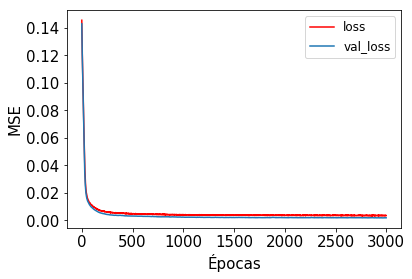

In [36]:
plt.plot(history.history['loss'],color='r',label="loss")
plt.plot(history.history['val_loss'],label="val_loss")
plt.xlabel(u"Épocas")
plt.ylabel("MSE")
plt.rc('font', size=12)
plt.legend()
plt.show()

In [14]:
# Faz a previsão para a base de teste
testeAtMes = autoencoder.predict(X_testAtMes)

In [15]:
# Calcula o erro (MSE) para o teste
autoencoder.evaluate(x=X_testAtMes, y=X_testAtMes, batch_size=attest_dim)

1103/1103 [==============================] - 0s 12us/step


0.0017540591613981443

In [16]:
# # Calcula o erro (MSE) para o treino
autoencoder.evaluate(x=X_trainAtMes, y=X_trainAtMes, batch_size=batch)

2572/2572 [==============================] - 0s 6us/step


0.0017638078988372228

In [17]:
# Calcula o score (R^2 ajustado) para o teste
r2 = r2_score(X_testAtMes,testeAtMes)
1 - (1-r2) * (len(testeAtMes) -1) / (len(testeAtMes) - encoding_dim1 -1)

0.8343913686629032

In [18]:
# Calcula o score (R^2 ajustado) para o treino
trainAtMes = autoencoder.predict(X_trainAtMes)
r2 = r2_score(X_trainAtMes,trainAtMes)
1 - (1-r2) * (len(trainAtMes) -1) / (len(trainAtMes) - encoding_dim1 -1)

0.8332236933914259

In [19]:
# Calcula o score para todas as features separadamente
testeAtMes = pd.DataFrame(testeAtMes, columns=df_atmes.columns)
score = {}
for c in testeAtMes.columns:
    score[c] = r2_score(X_testAtMes[c],testeAtMes[c])
    # R² ajustado com k igual ao número de neurônios na camada decodificada
    score[c] = 1 - (1-score[c]) * (len(testeAtMes) -1) / (len(testeAtMes) - encoding_dim1 -1)
score

{'coolingdegreedays': 0.9263064582791256,
 'date': 0.8109144862835137,
 'fog': 0.99916242052217,
 'gdegreedays': 0.9514503626071784,
 'hail': 0.9848275265828609,
 'heatingdegreedays': 0.9193211481421264,
 'humidity': 0.8938105502310492,
 'lat': 0.9188566814918294,
 'lng': 0.5150983629065636,
 'maxdewptm': 0.9075173135633335,
 'maxhumidity': 0.8453102198604088,
 'maxpressurem': 0.8413754580067568,
 'maxtempm': 0.8585874157549639,
 'maxwspdm': 0.42959077938115486,
 'meandewptm': 0.9565933007793124,
 'meanpressurem': 0.8998949726172687,
 'meantempm': 0.9596976582151732,
 'meanwdird': 0.9603473459198595,
 'meanwindspdm': 0.5522392573048716,
 'mindewptm': 0.898313587532328,
 'minhumidity': 0.8994333696747624,
 'minpressurem': 0.8495658150485013,
 'mintempm': 0.8838589741256887,
 'minwspdm': 0.6450656424355381,
 'precipm': 0.06015805084069248,
 'rain': 0.9993771795211083,
 'snow': 0.997664691673045,
 'thunder': 0.9986192932601069}

# Feature Selection

('precipm', 0.06015805084069248)
('maxwspdm', 0.42959077938115486)
('lng', 0.5150983629065636)
('meanwindspdm', 0.5522392573048716)
('minwspdm', 0.6450656424355381)


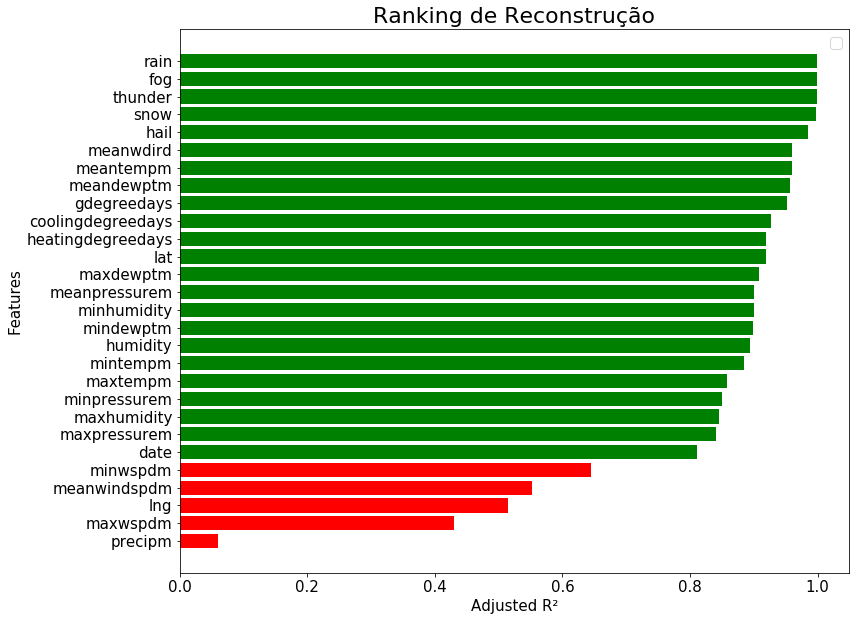

In [37]:
bads = []
values = []
rank = []
rankv = []
# Ranqueia
for b in sorted(score, key = score.get):
    rank.append(b)
    rankv.append(score[b])
    
# Separa as ruins
for a in sorted(score, key = score.get):
    if(score[a] < 0.8):
        print(a,score[a])
        bads.append(a)
        values.append(score[a])
        rank.remove(a)
        rankv.remove(score[a])

# Plota gráfico de barras horizontais
plt.figure(figsize=(12,10))
plt.rc('font', size=15)
plt.rc('axes', titlesize=22)
plt.title(u"Ranking de Reconstrução")
plt.legend()
plt.xlabel(u"Adjusted R²")
plt.ylabel("Features")
plt.barh(bads,values,color='r')
plt.barh(rank,rankv,color='green')
plt.savefig('ranking_reconstrucao.svg', format="svg", bbox_inches='tight')

In [ ]:
for b in bads:
    df_atmes.drop(b,axis=1,inplace=True)
df_atmes.describe()

# Variational Autoencoder